In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from matplotlib.pyplot import figure
# from pandas.table.plotting import table



AAPL = pd.read_csv(r'../data/AAPL.csv', index_col = 0)
IBM = pd.read_csv(r'../data/IBM.csv', index_col = 0)
JPM = pd.read_csv(r'../data/JPM.csv', index_col = 0)
DJI = pd.read_csv(r'../data/DJI.csv', index_col = 0)

stock_names = ["AAPL", "IBM", "JPM", "DJI"]

AAPL['1DReturn'] = AAPL['Adj Close'].pct_change()
IBM['1DReturn'] = IBM['Adj Close'].pct_change()
JPM['1DReturn'] = JPM['Adj Close'].pct_change()
DJI['1DReturn'] = DJI['Adj Close'].pct_change()

stocks = [AAPL, IBM, JPM, DJI]
asdf = ["a","b","c","d"]

In [2]:
print(AAPL.index.get_loc("2018-05-14"))
print(AAPL.index.get_loc("2018-09-14"))
print(AAPL.index.get_loc("2018-12-14"))
print(AAPL.index.get_loc("2019-01-14"))

40
126
189
208


In [3]:
AAPL["Close with outlier"] = AAPL["Adj Close"]
IBM["Close with outlier"] = IBM["Adj Close"]
JPM["Close with outlier"] = JPM["Adj Close"]
DJI["Close with outlier"] = DJI["Adj Close"]

for stock in stocks:
    stock_max = stock["Close with outlier"].max()*1.2
    stock["Close with outlier"].loc[stock.index[40]] = stock_max
    stock["Close with outlier"].loc[stock.index[126]] = stock_max
    stock["Close with outlier"].loc[stock.index[189]] = stock_max
    stock["Close with outlier"].loc[stock.index[208]] = stock_max
    

C:\Users\thtan\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


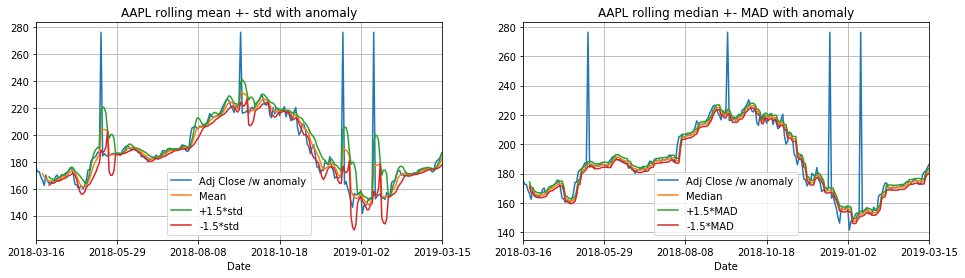

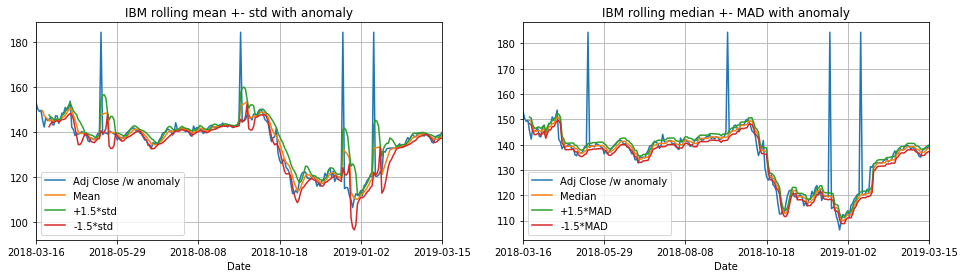

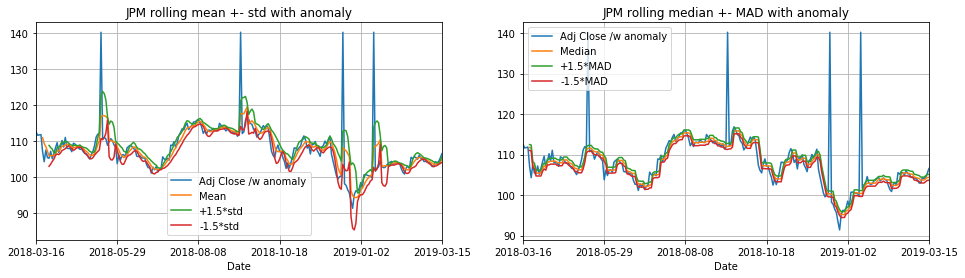

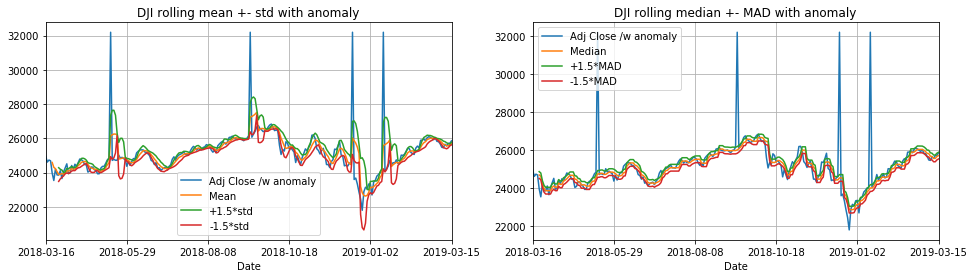

In [4]:

for i,stock in enumerate(stocks):
    mean = stock['Close with outlier'].rolling(5).mean()
    std = 1.5*mean.rolling(5).std()

    median = stock['Close with outlier'].rolling(5).median()


    median = stock['Close with outlier'].rolling(5).median()
    mad = 1.5*(median.rolling(5).median()-median).abs().median()


    plt.figure
    figure(figsize=(16,4))

    plt.subplot(121)
    stock['Close with outlier'].plot()
    mean.plot()
    (mean+std).plot()
    (mean-std).plot()
    plt.title(str(stock_names[i])+" rolling mean +- std with anomaly")
    plt.grid()
    plt.legend(["Adj Close /w anomaly","Mean", "+1.5*std", "-1.5*std"])


    plt.subplot(122)
    stock['Close with outlier'].plot()
    median.plot()
    (median+mad).plot()
    (median-mad).plot()
    plt.title(str(stock_names[i])+" rolling median +- MAD with anomaly")
    plt.grid()
    plt.legend(["Adj Close /w anomaly","Median", "+1.5*MAD", "-1.5*MAD"])

    dest = "../result/4_1_4_"+str(asdf[i])+".png"
    plt.savefig(dest)